In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
df=pd.read_csv("/content/student_data.csv")
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [ ]:
df.dtypes  #to check datatype of each column

admit      int64
gre        int64
gpa      float64
rank       int64
dtype: object

In [ ]:
df.isnull().sum()  #no null values

admit    0
gre      0
gpa      0
rank     0
dtype: int64

In [ ]:
df.describe()  # => there exists some outliers, need to be treated before training

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


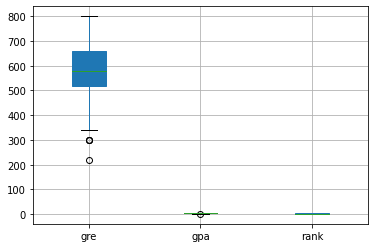

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots()
boxplot = df.boxplot(column=['gre', 'gpa','rank'],patch_artist=True)

plt.show()  #outliers found in gre column

In [ ]:
#handling the outlier
import numpy as np

gre=df['gre']
gre=sorted(gre)
gre_q1=np.percentile(gre, 25, interpolation = 'midpoint')  # gre_q1 is the first quartile range
gre_q3 = np.percentile(gre, 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR_gre = gre_q3 - gre_q1

df["gre"] = np.where(df["gre"] < gre_q1, (gre_q1-1.5*IQR_gre), df['gre'])  #replacing min outliers with 
                                                                           #first quartile value
                                                                       

In [ ]:
gpa=df['gpa']
gpa=sorted(gpa)
gpa_q1=np.percentile(gpa, 25, interpolation = 'midpoint')  # gre_q1 is the first quartile range
gpa_q3 = np.percentile(gpa, 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR_gpa = gpa_q3 - gpa_q1

df["gpa"] = np.where(df["gpa"] < gpa_q1, (gpa_q1-1.5*IQR_gpa), df['gpa'])  #replacing min outliers with 
                                                                           #first quartile value

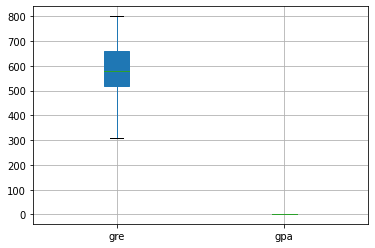

In [ ]:
fig, axs = plt.subplots()
boxplot = df.boxplot(column=['gre','gpa'],patch_artist=True)

plt.show()  #outliers found in gre column

In [ ]:
column_1 = df["gpa"]
column_2 = df["rank"]
correlation = column_1.corr(column_2)
correlation #not related

-0.05243651907479859

In [ ]:
column_1 = df["gpa"]
column_2 = df["gre"]
correlation = column_1.corr(column_2)
correlation #not related

0.3443950865378344

DEEP NEURAL NETWORK - single fully connected layer

In [ ]:
model = Sequential()
model.add(Dense(60, input_dim=3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
Y=df[['admit']]
X=df[['gre','gpa','rank']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
predict_values=model.predict(X_test)

In [ ]:
len(predict_values)

120

In [ ]:
pred=[]
for i in range(len(predict_values)):
  if predict_values[i]>0.5:
    pred.append(1)
  else:
    pred.append(0)


len(pred)

120

In [ ]:
yy=y_test['admit']

In [ ]:
correct = (pred == yy)
accuracy = correct.sum() / correct.size
accuracy  # => not reliable

0.675

In [ ]:
#using ML models

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(df[['gre','gpa','rank']],df['admit'])
predictions=model.predict(df[['gre','gpa','rank']])
prob=model.predict_proba(df[['gre','gpa','rank']])


In [ ]:
df['predicted_labels']=predictions
print(df['predicted_labels'].value_counts())  #unbalanced labels
df['admit'].value_counts()   

0    353
1     47
Name: predicted_labels, dtype: int64


0    273
1    127
Name: admit, dtype: int64

In [ ]:
matches=df['admit']==df['predicted_labels']
correct_predictions=df[matches]
accuracy=len(correct_predictions)/df.shape[0]
accuracy  #somewhat better.

0.705

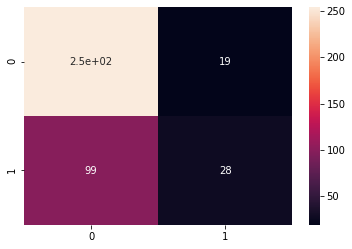

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(df['admit'], df['predicted_labels'])
sns.heatmap(cf_matrix, annot=True)  #False positives are high.
